<a href="https://colab.research.google.com/github/parth3120/dip/blob/main/MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def walshmatrix(n):
    "2^n x 2^n"
    if n == 1:
        return np.array([[1,1],[1,-1]])
    else:
        W = walshmatrix(n-1)
        return np.vstack((np.hstack((W, W)), np.hstack((W,-W))))
num = 8

def simulate_cdma():
    wm = walshmatrix(np.log2(num))

    in_ = 4

    message_bits = np.array([1,-1,1,-1])

    transmitted_data = []

    for bit in message_bits:
        transmitted_data.append(bit*wm[in_])
    transmitted_data = np.array(transmitted_data)
    # print(transmitted_data)

    noise = np.random.normal(0, 0.5, transmitted_data.shape)

    received_signal = transmitted_data + noise
    print(received_signal)
    for user in range(num):
        print("User",user)
        decoded_bit = []
        noise_arr = []
        signal_arr = []
        snr_arr = []
        for bits in received_signal:
            corr = np.dot( bits , wm[user])/ len(wm[user])

            signal_power = corr**2
            # recived - recontracted signal
            noise = np.var(bits - corr*wm[user])
            bit_d = 1 if corr > 0 else -1
            snr = float("inf") if noise == 0 else 10*np.log10(signal_power/noise)
            snr_arr.append(snr)
            noise_arr.append(noise)
            signal_arr.append(signal_power)
            decoded_bit.append(bit_d)

        print("Decoded:",decoded_bit)
        print("Transmitted:",message_bits)
        print("Success?", (decoded_bit==message_bits).all())
        print("SNR(DB): ", np.mean(snr))
        print("Noise:", np.mean(noise_arr))
        print("SignalPow:", np.mean(signal_arr))
        print("="*60)


simulate_cdma()

[[ 0.96613491  0.99476981  1.12477948  0.94008814 -1.89541817 -1.37018538
  -0.32586473 -0.66950713]
 [-0.41393578 -1.32129036 -1.29587432 -0.00491423  1.83514985  1.79264242
   1.39712896  0.51688809]
 [-0.0738136   0.90961289  1.0208554   1.09173773 -0.85560397 -1.12348197
  -1.04202866 -0.64673434]
 [-2.10127924 -0.6942469  -1.35254418 -1.03127766  1.33868333  0.43789666
   0.82925032  1.13480914]]
User 0
Decoded: [-1, 1, -1, -1]
Transmitted: [ 1 -1  1 -1]
Success? False
SNR(DB):  -16.474946799536877
Noise: 1.240400698208326
SignalPow: 0.034850887194103154
User 1
Decoded: [-1, 1, -1, -1]
Transmitted: [ 1 -1  1 -1]
Success? False
SNR(DB):  -18.488179160517035
Noise: 1.228792685979949
SignalPow: 0.011608012228376922
User 2
Decoded: [-1, 1, -1, -1]
Transmitted: [ 1 -1  1 -1]
Success? False
SNR(DB):  -24.06620773782928
Noise: 1.2009929600839344
SignalPow: 0.03940773812439176
User 3
Decoded: [-1, 1, -1, 1]
Transmitted: [ 1 -1  1 -1]
Success? False
SNR(DB):  -38.00823358151094
Noise: 1.22

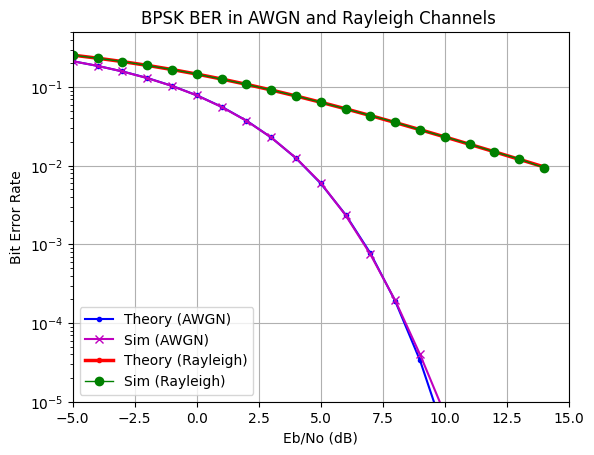

In [ ]:
import numpy as np
from scipy.special import erfc
import matplotlib.pyplot as plt

# Parameters
N = int(1e6)
# np.random.seed(100)

# Transmitter
ip = np.random.rand(N) > 0.5
s = 2 * ip - 1

# Noise vector (0 dB variance)
n = (1/np.sqrt(2)) * (np.random.randn(N) + 1j * np.random.randn(N))

# Eb/No range from 0 to 60 dB
Eb_No_dB = np.arange(-5, 15)
nErr_AWGN = np.zeros_like(Eb_No_dB, dtype=int)
nErr_Rayleigh = np.zeros_like(Eb_No_dB, dtype=int)

# Simulation loop
for idx, eb in enumerate(Eb_No_dB):
    scale = 10**(-eb/20)
    # AWGN channel
    y_AWGN = s + scale * n
    # Rayleigh fading channel
    h = (1/np.sqrt(2)) * (np.random.randn(N) + 1j * np.random.randn(N))
    y_Rayleigh = h * s + scale * n
    y_eq = y_Rayleigh / h

    # Hard‐decision detection
    ipHat_AWGN     = np.real(y_AWGN) > 0
    ipHat_Rayleigh = np.real(y_eq)   > 0

    # Error counting
    nErr_AWGN[idx]     = np.sum(ip != ipHat_AWGN)
    nErr_Rayleigh[idx] = np.sum(ip != ipHat_Rayleigh)

# Compute BER
simBer_AWGN     = nErr_AWGN     / N
simBer_Rayleigh = nErr_Rayleigh / N

# Theoretical BER curves
theoryBer_AWGN     = 0.5 * erfc(np.sqrt(10**(Eb_No_dB/10)))
theoryBer_Rayleigh = 0.5 * (1 - np.sqrt(10**(Eb_No_dB/10) / (1 + 10**(Eb_No_dB/10))))

# Plot combined BER vs Eb/No from 0 to 60 dB
plt.figure()
plt.semilogy(Eb_No_dB, theoryBer_AWGN,     'b.-', linewidth=1.5)
plt.semilogy(Eb_No_dB, simBer_AWGN,        'mx-', linewidth=1.5)
plt.semilogy(Eb_No_dB, theoryBer_Rayleigh, 'r.-', linewidth=2.5)
plt.semilogy(Eb_No_dB, simBer_Rayleigh,    'go-', linewidth=1.)
plt.axis([-5, 15, 1e-5, 0.5])
plt.grid(True)
plt.legend(['Theory (AWGN)', 'Sim (AWGN)', 'Theory (Rayleigh)', 'Sim (Rayleigh)'])
plt.xlabel('Eb/No (dB)')
plt.ylabel('Bit Error Rate')
plt.title('BPSK BER in AWGN and Rayleigh Channels ')
plt.show()


In [ ]:
import numpy as np
import random

def generate_walsh_matrix(n):
    if n == 1:
        return np.array([[1, 1], [1, -1]])
    W = generate_walsh_matrix(n - 1)
    top = np.hstack((W, W))
    bottom = np.hstack((W, -W))
    return np.vstack((top, bottom))

def simulate_cdma(num_users=8, num_bits=16, noise_std=0.5):
    walsh_size = int(np.log2(num_users))
    walsh_codes = generate_walsh_matrix(walsh_size)

    print("Walsh Matrix:")
    print(walsh_codes)
    print("=" * 50)

    subscribed_idx = random.randint(0, num_users - 1)
    message_bits = [1,1,0,1,4]
    code = walsh_codes[subscribed_idx]
    encoded_signal = np.array([bit * code for bit in message_bits])
    noise = np.random.normal(0, noise_std, size=encoded_signal.shape)
    received_signal = encoded_signal + noise

    print(f"Intended User: {subscribed_idx + 1}, Transmitting bit: {message_bits}")
    print("Transmitted Signal (before noise):")
    print(code * message_bits[0])
    print("Noise Added:")
    print(noise[0])
    print("Received Signal (with noise):")
    print(received_signal[0])
    print("=" * 50)

    print(f"{'User':<5}{'Type':<12}{'Correlation':<15}{'Signal Power':<15}{'Noise Power':<15}{'Recived Data':<15}{'SNR (dB)':>15}")
    print("-" * 80)

    intended_corr = None
    intended_snr = None
    intended_sigp = None
    intended_noisep = None
    unintended_corrs = []
    unintended_snrs = []
    unintended_sigp = []
    unintended_noisep = []

    for i in range(num_users):
        user_code = walsh_codes[i]
        corr = np.dot(received_signal[0], user_code) / len(user_code)
        sig_power=corr**2
        noise_power = np.var(received_signal[0] - corr * user_code)
        # snr_db = float('inf') if 10 * np.log10(sig_power / noise_power) < 0 else 10 * np.log10(sig_power / noise_power)
        snr_db=10 * np.log10(sig_power / noise_power)
        user_type = "Intended" if i == subscribed_idx else "Unintended"
        bit_data= 1 if corr<0 else -1

        # Printing the user information in a nicely formatted manner
        print(f"{i+1:<5}{user_type:<12}{corr:<15.4f}{sig_power:<15.6f}{noise_power:<15.6f}{bit_data:<15}"
              f"    {snr_db if np.isfinite(snr_db) else '-inf':>15}")

        if user_type == "Intended":
            intended_corr = corr
            intended_snr = snr_db
            intended_sigp = sig_power
            intended_noisep = noise_power
        else:
            unintended_corrs.append(corr)
            unintended_snrs.append(snr_db)
            unintended_sigp.append(sig_power)
            unintended_noisep.append(noise_power)

    print("=" * 50)
    print("SUMMARY RESULTS:")
    print(f"Intended User {subscribed_idx + 1}:")
    print(f"- Correlation: {intended_corr:+.4f}")
    print(f"- SNR: {intended_snr:.2f} dB")
    print(f"- Signal Power: {intended_sigp:.6f}")
    print(f"- Noise Power: {intended_noisep:.6f}")
    print("Average Unintended User:")
    avg_corr = np.mean(unintended_corrs)
    avg_snr = '-inf' if not any(np.isfinite(unintended_snrs)) else f"{np.mean(unintended_snrs):.2f}"
    print(f"- Avg Correlation: {avg_corr:+.6f}")
    print(f"- Avg SNR: {avg_snr} dB")
    print(f"- Avg Signal Power: {np.mean(unintended_sigp):.6f}")
    print(f"- Avg Noise Power: {np.mean(unintended_noisep):.6f}")
    print("=" * 50)

simulate_cdma(8, 1)


Walsh Matrix:
[[ 1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1]]
Intended User: 2, Transmitting bit: [1, 1, 0, 1, 4]
Transmitted Signal (before noise):
[ 1 -1  1 -1  1 -1  1 -1]
Noise Added:
[ 0.77110927  0.19233161 -0.22404929  1.5611957   0.42183023  0.50134386
 -0.04134474  0.75645728]
Received Signal (with noise):
[ 1.77110927 -0.80766839  0.77595071  0.5611957   1.42183023 -0.49865614
  0.95865526 -0.24354272]
User Type        Correlation    Signal Power   Noise Power    Recived Data          SNR (dB)
--------------------------------------------------------------------------------
1    Unintended  0.4924         0.242418       0.751931       -1                 -4.916137742192621
2    Intended    0.7395         0.546900       0.205031       -1                 4.260895986709321
3    Unintended  -0.0207        0.000429  

In [ ]:
# import socket

# # Server Code
# def start_server(host='0.0.0.0', port=5001, buffer_size=4096, filename='received_file.txt'):
#     server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
#     server_socket.bind((host, port))
#     server_socket.listen(5)
#     print(f"[*] Listening on {host}:{port}")

#     conn, addr = server_socket.accept()
#     print(f"[+] Connection from {addr}")

#     with open(filename, 'wb') as file:
#         while True:
#             data = conn.recv(buffer_size)
#             if not data:
#                 break
#             file.write(data)

#     print(f"[+] File received and saved as {filename}")
#     conn.close()
#     server_socket.close()

# if __name__ == "__main__":  # use comeented in exam as only data is to transfer not file name
#     start_server()

import socket
import os

def start_server(host='0.0.0.0', port=5001, buffer_size=4096):
    print(f"[INFO] Starting server on {host}:{port}")
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.bind((host, port))
    server_socket.listen(5)
    print("[INFO] Server is listening for incoming connections")

    conn, addr = server_socket.accept()
    print(f"[SUCCESS] Connection established with {addr}")

    file_name = b''
    while True:
        byte = conn.recv(1)
        if byte == b'\n':
            break
        file_name += byte
    file_name = file_name.decode()
    print(f"[INFO] Receiving file: {file_name}")

    os.makedirs("op", exist_ok=True)
    with open(f"op/{file_name}", 'wb') as file:
        while True:
            data = conn.recv(buffer_size)
            if not data:
                break
            file.write(data)

    print(f"[SUCCESS] File received and saved as op/{file_name}")
    conn.close()
    server_socket.close()
    print("[INFO] Server shutdown")

if __name__ == "__main__":
    start_server()





In [ ]:
# import socket

# # Client Code
# def send_file(server_host, server_port, file_path, buffer_size=4096):
#     client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
#     client_socket.connect((server_host, server_port))
#     print(f"[+] Connected to {server_host}:{server_port}")

#     with open(file_path, 'rb') as file:
#         while (chunk := file.read(buffer_size)):
#             client_socket.sendall(chunk)

#     print("[+] File sent successfully")
#     client_socket.close()

# if __name__ == "__main__":
#     send_file("127.0.0.1", 5001, "main.txt")
# use comeented in exam as only data is to transfer not file name

import socket
import os

def send_file(server_host, server_port, file_path, buffer_size=4096):
    print(f"[INFO] Initiating connection to {server_host}:{server_port}")
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    client_socket.connect((server_host, server_port))
    print(f"[SUCCESS] Connected to server")

    file_name = os.path.basename(file_path)
    client_socket.sendall(file_name.encode() + b'\n')
    print(f"[INFO] Sending file: {file_name}")

    with open(file_path, 'rb') as file:
        while (chunk := file.read(buffer_size)):
            client_socket.sendall(chunk)

    print("[SUCCESS] File transmission completed")
    client_socket.close()

if __name__ == "__main__":
    send_file("127.0.0.1", 5001, "main.txt")

